# Assignment: OECD Producer Price Index

The [producer price index](https://en.wikipedia.org/wiki/Producer_price_index) (PPI) measures the rate of change of price for products sold as they leave the producer. [OECD](http://oecd.org/), an intergovernmental organization, maintains a dataset of PPI for countries around the world. In this assignment, you will visualize the PPI of various countries from Jan 2011 to Jan 2023 as high dimensional data.

## Data

* [PPI dataset](https://data.oecd.org/price/producer-price-indices-ppi.htm#indicator-chart)

The important columns of this dataset are `LOCATION`, `TIME` and `Value`. We will treat the per-country PPI values over time as a single data point. I.e. Each high dimension data point consists of all the values from Jan 2011 to Jan 2023 for a given country. You may want to use `pandas.pivot` to switch the data frame from long form to wide form. For this assignment, we will replace all `NaN` values by 0. 

## Task

Your task for this assignment is to find a two-dimensional embedding of this high dimensional dataset that clusters countries with similar PPI value history together. The final visualization should be a 2D scatter plot. The x and y axis should map to the components computed from the dimension reduction algorithm.  The location information should be encoded as color.

Please use this notebook for this assignment.

In [14]:
!pip install scikit-learn

In [15]:
import sklearn
import altair as alt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [16]:
url = "https://github.com/qnzhou/practical_data_visualization_in_python/files/14559866/oecd_ppi.csv"
data = pd.read_csv(url)

In [17]:
data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,PPI,DOMESTIC,IDX2015,M,2011-01,98.65053,NaN
1,AUT,PPI,DOMESTIC,IDX2015,M,2011-02,99.12756,NaN
2,AUT,PPI,DOMESTIC,IDX2015,M,2011-03,99.98622,NaN
3,AUT,PPI,DOMESTIC,IDX2015,M,2011-04,100.36780,NaN
4,AUT,PPI,DOMESTIC,IDX2015,M,2011-05,100.36780,NaN


## About the data

#### Location and Time are Independant Variables
#### Value is the Dependant Variable

Each monthly PPI value is considered one dimension.

With 12 months per year over approximately 12 years, we have around 144 dimensions per country (one per month over the time period).

Therefore, each country has a vector of 144 values representing its PPI history. When we visualize it, we’re dealing with high-dimensional data (144 dimensions for each country), which we want to ideally reduce to just 2 dimensions (2D plot) for easy plotting.

In [18]:
# Pivot data to create a country-time matrix and fill null values with 0
data_pivoted = data.pivot(index="LOCATION", columns="TIME", values="Value").fillna(0)

In [19]:
data_pivoted

TIME,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01
LOCATION,,,,,,,,,,,,,,,,,,,,,
AUT,98.65053,99.12756,99.98622,100.36780,100.36780,100.46330,100.46330,100.36780,100.46330,100.55870,...,125.3637,126.6903,128.1275,128.0169,127.2430,128.7908,127.9063,126.4692,127.1325,0.0000
BEL,105.10000,106.20000,107.10000,107.90000,107.70000,107.60000,107.60000,107.30000,107.50000,107.40000,...,155.0000,157.3000,160.2000,158.2000,157.7000,156.2000,158.1000,157.1000,155.3000,0.0000
CHE,105.01240,105.27230,105.64670,105.65280,105.47970,105.13020,104.75290,104.40430,104.50530,104.24700,...,107.2716,108.3059,108.9728,109.3016,109.6301,109.7087,109.6758,109.7475,109.4631,0.0000
COL,89.16204,90.01339,90.61604,90.84561,91.39085,91.40999,91.10388,91.38129,91.48651,92.16568,...,143.0170,145.6189,145.6189,149.2730,148.4886,149.8948,152.2862,154.2950,153.5393,0.0000
CRI,84.55310,85.49834,87.08256,88.83438,89.42461,90.18393,90.41148,90.10818,89.99454,90.05784,...,131.6622,134.6859,137.2771,138.3730,137.4205,136.5310,136.1210,135.5293,134.7552,0.0000
CZE,98.00000,98.50000,99.70000,100.60000,101.00000,100.90000,100.80000,100.80000,101.00000,101.10000,...,129.5000,133.6000,136.2000,135.6000,134.4000,134.2000,136.0000,134.5000,132.0000,0.0000
DEU,98.64141,99.41129,99.89247,100.37360,100.37360,100.56610,100.66240,100.46990,100.75860,100.66240,...,126.8000,128.5000,129.1000,129.6000,129.9000,131.0000,131.8000,131.2000,130.7000,0.0000
DNK,95.50000,95.70000,96.40000,97.10000,97.40000,97.60000,97.90000,97.90000,98.40000,98.20000,...,125.4000,126.6000,128.3000,129.7000,129.9000,130.2000,131.3000,130.3000,129.6000,0.0000
EA19,99.50000,100.40000,101.30000,102.00000,101.80000,101.80000,102.10000,101.90000,102.20000,102.00000,...,128.6000,130.6000,132.5000,132.1000,131.6000,132.1000,133.4000,132.6000,131.3000,0.0000


In [20]:
data_pivoted.shape

(40, 145)

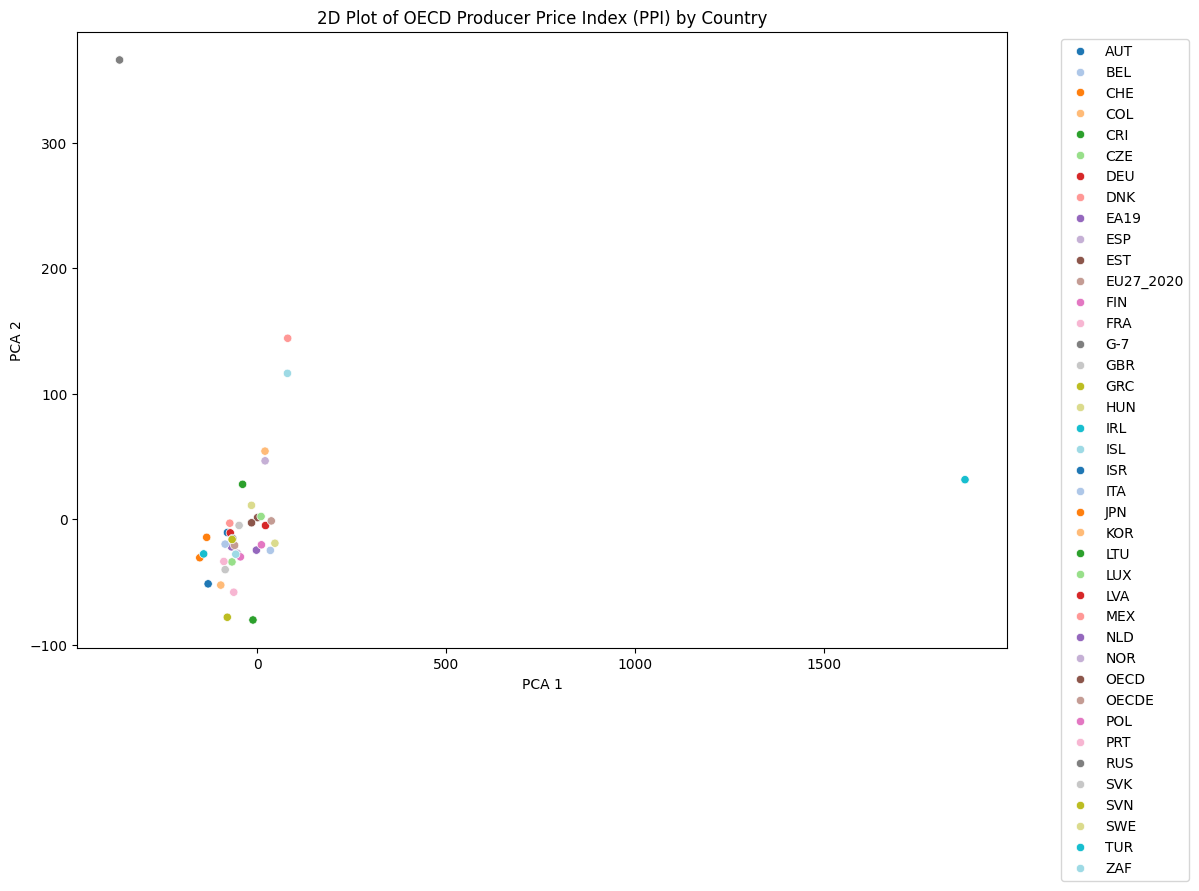

In [21]:
# Dimensionality reduction using PCA 
pca = PCA(n_components=2)

#Transform
components = pca.fit_transform(data_pivoted)

#Convert dataframe
results = pd.DataFrame(components, columns=["PCA 1", "PCA 2"])
results["Country"] = data_pivoted.index

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Country", palette="tab20", data=results)
plt.title("2D Plot of OECD Producer Price Index (PPI) by Country")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### PCA is not able to cluster properly, there is significant overlap of the points
## Let us try t-sne with different perplexity values

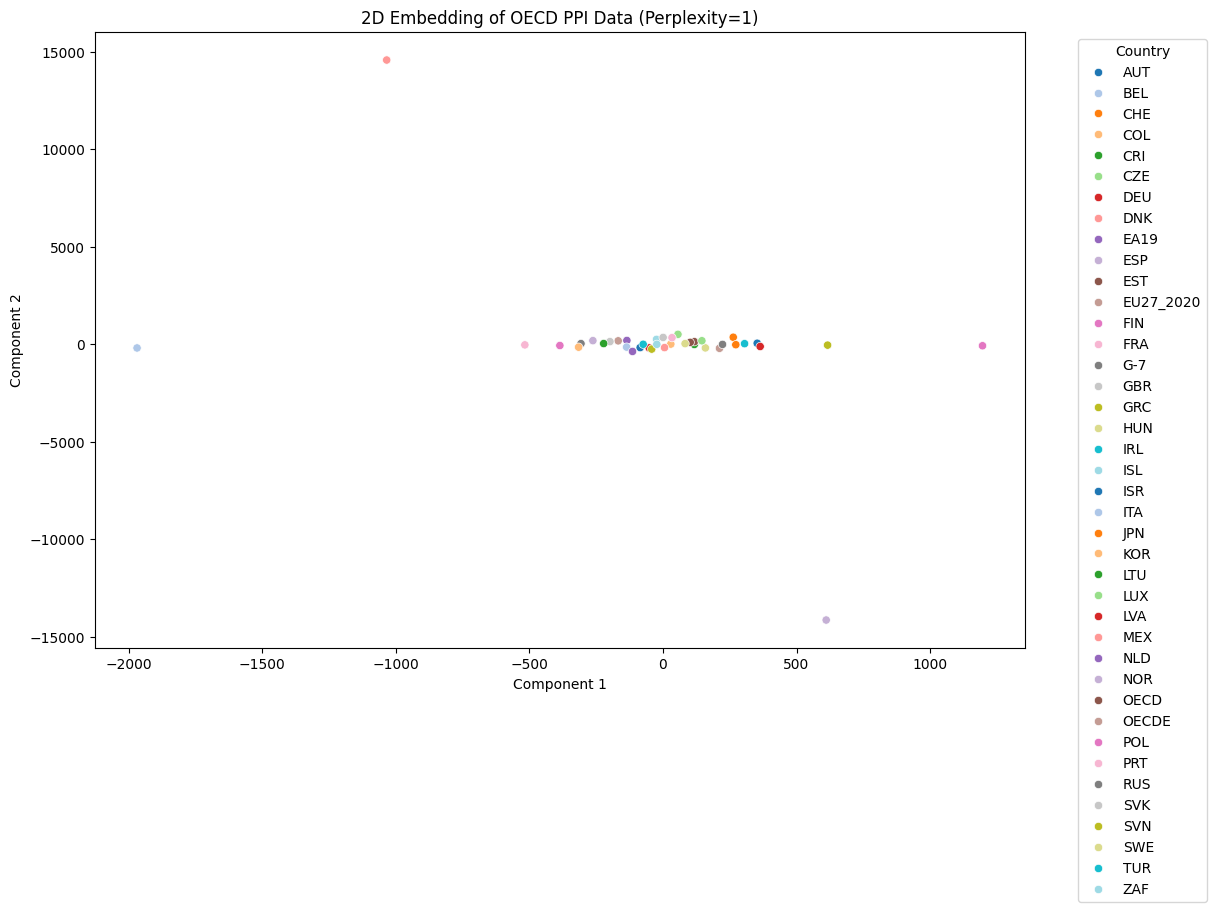

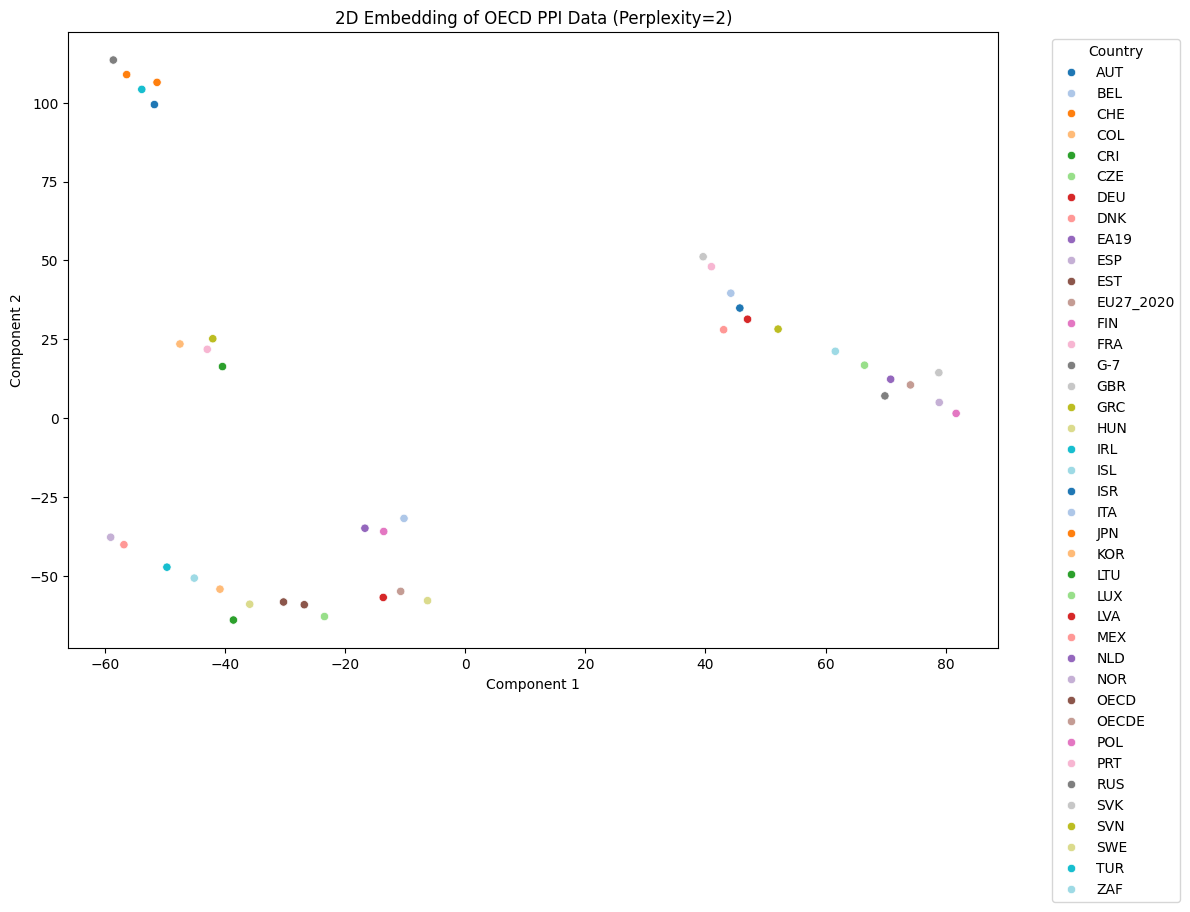

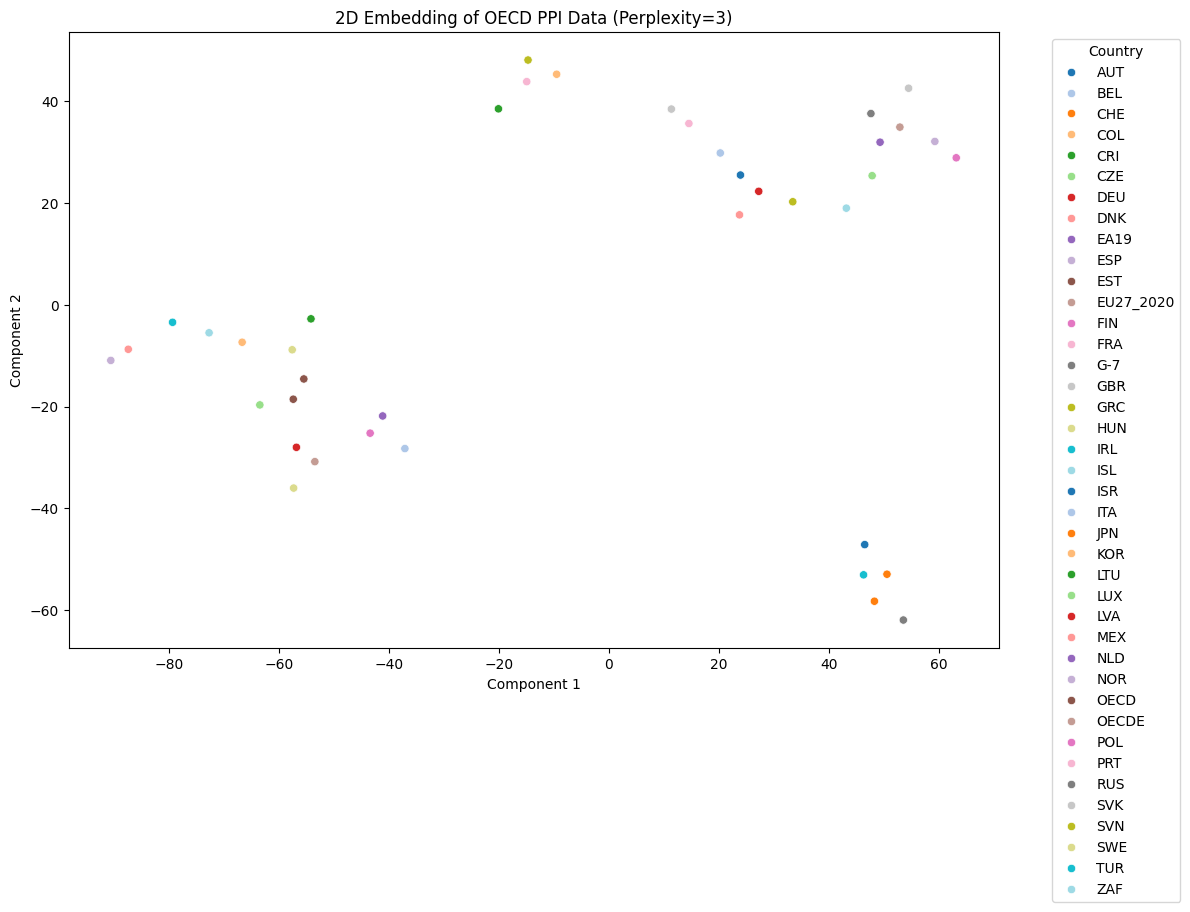

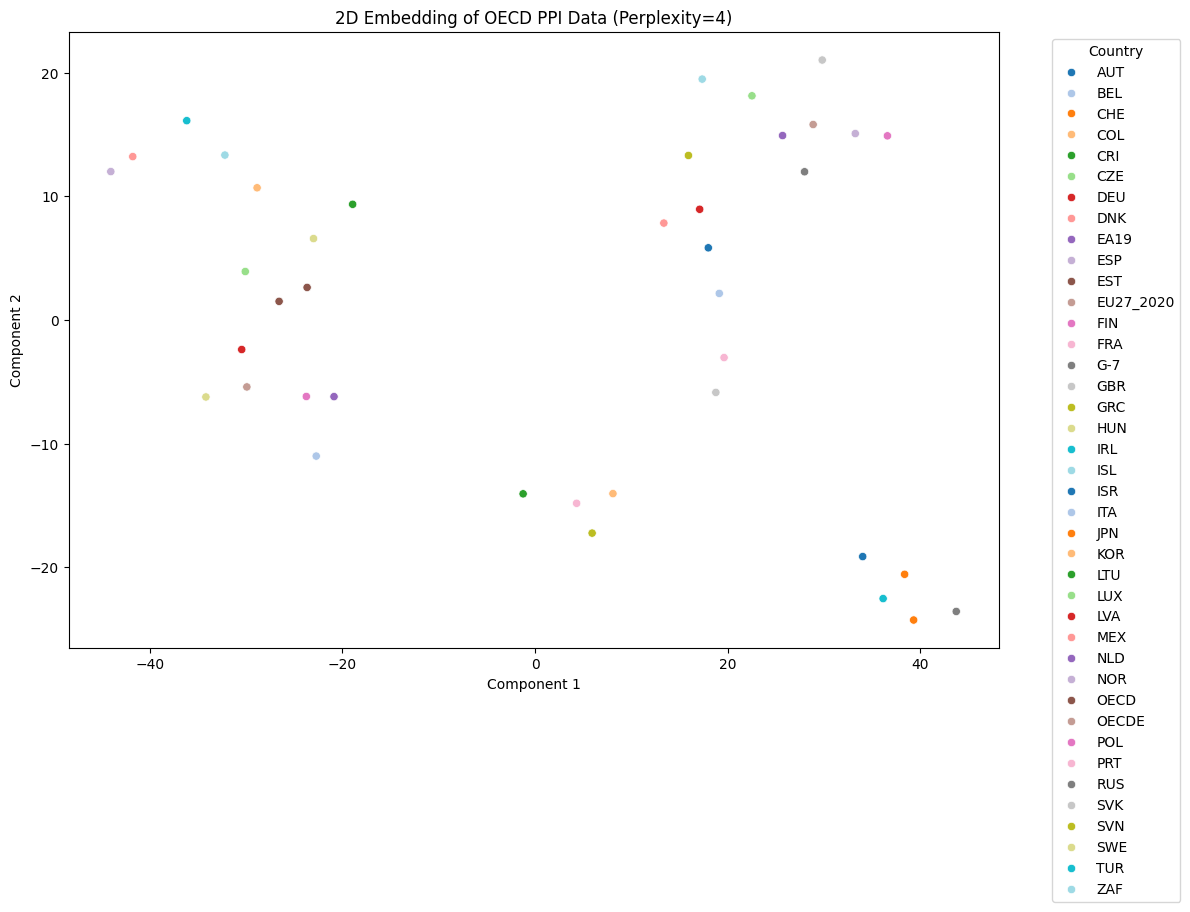

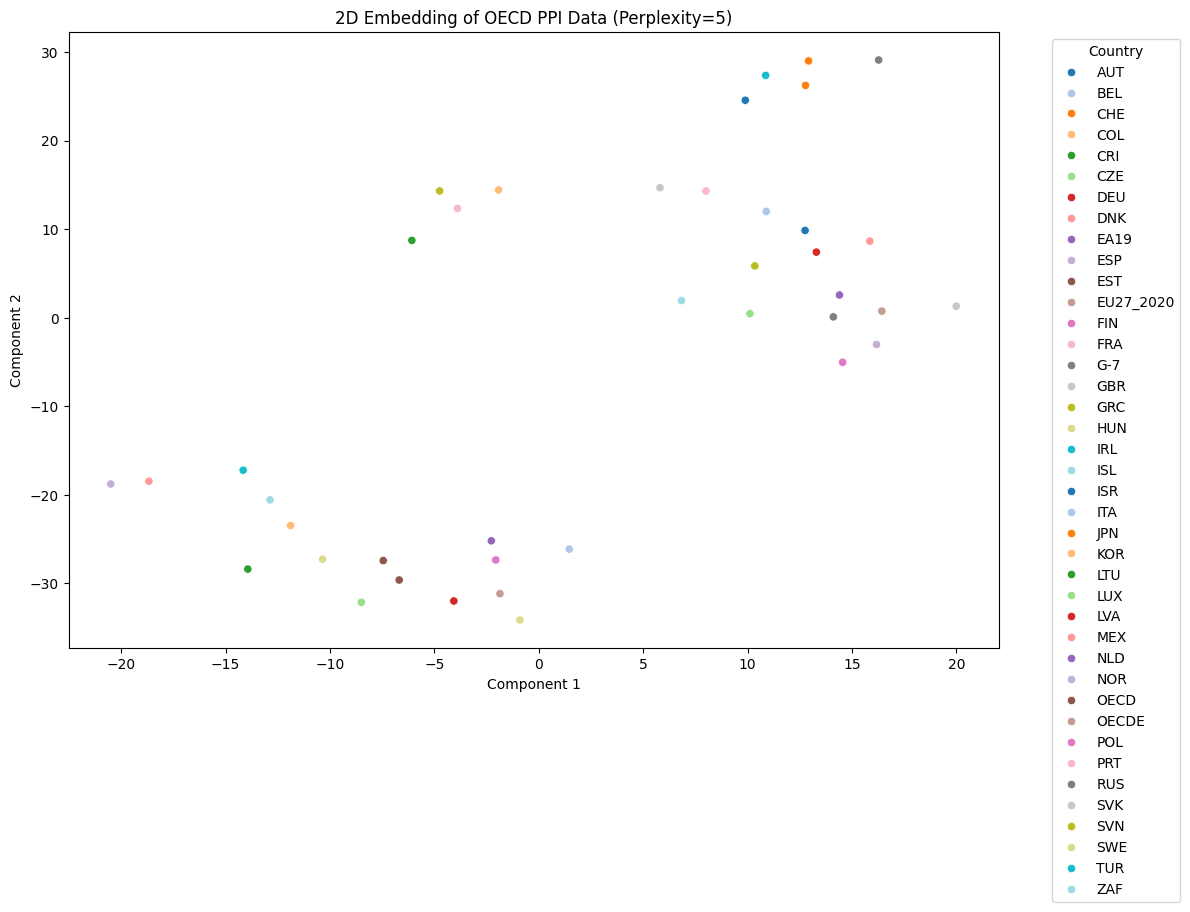

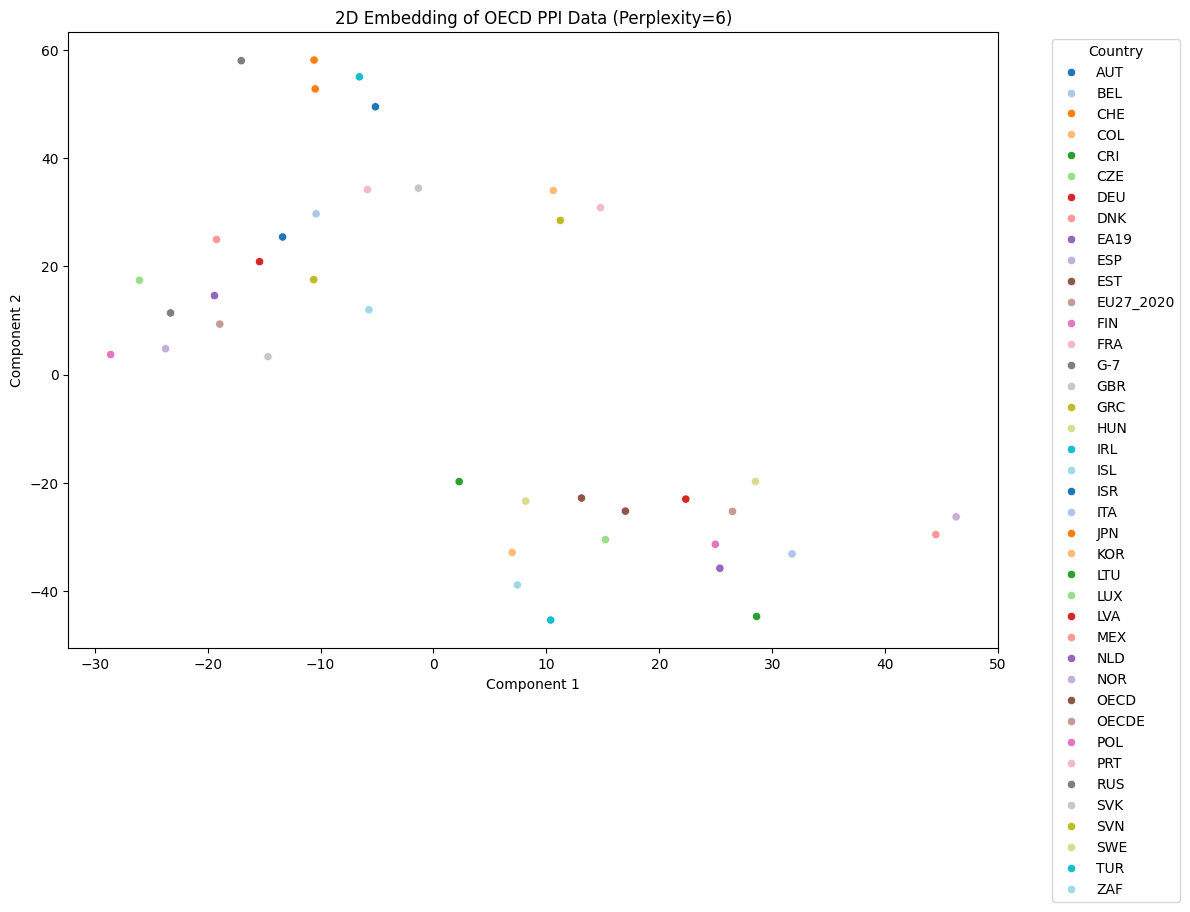

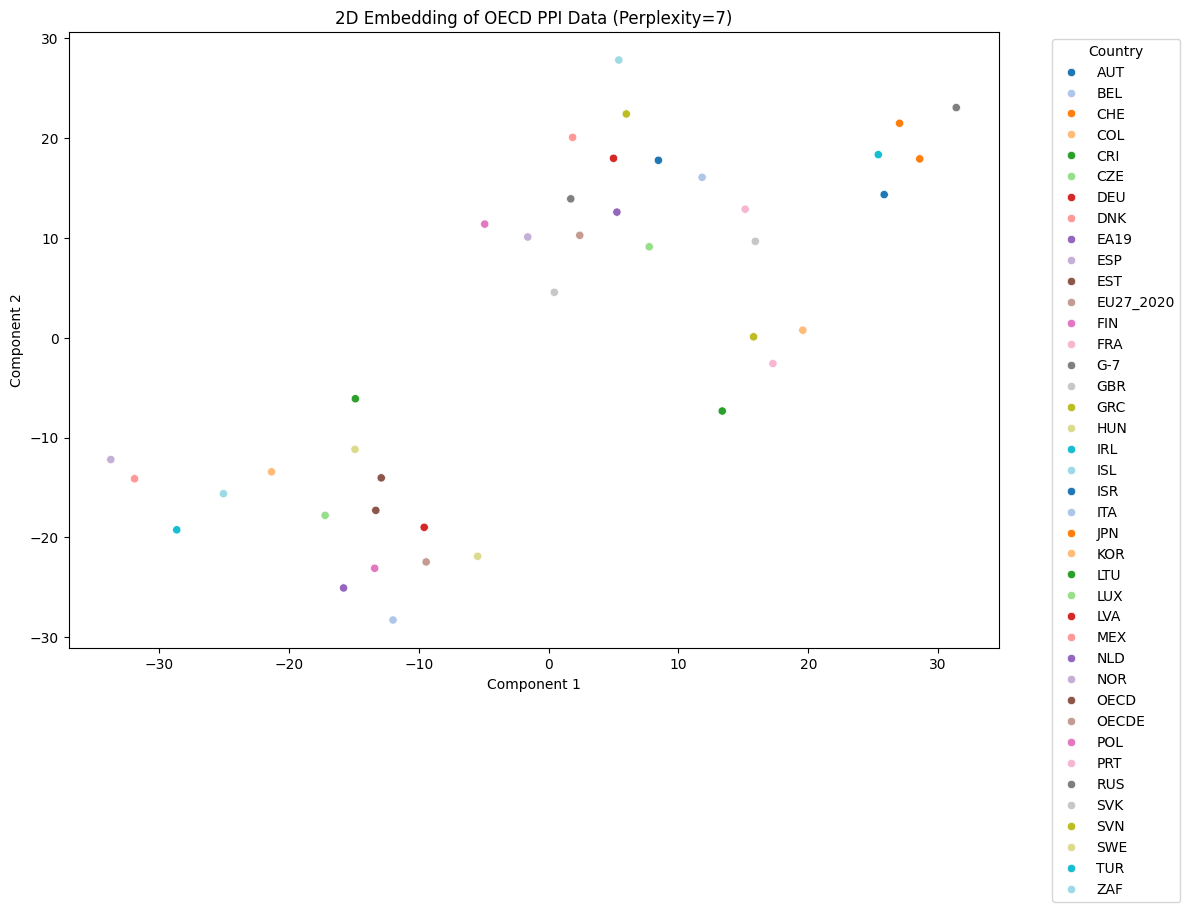

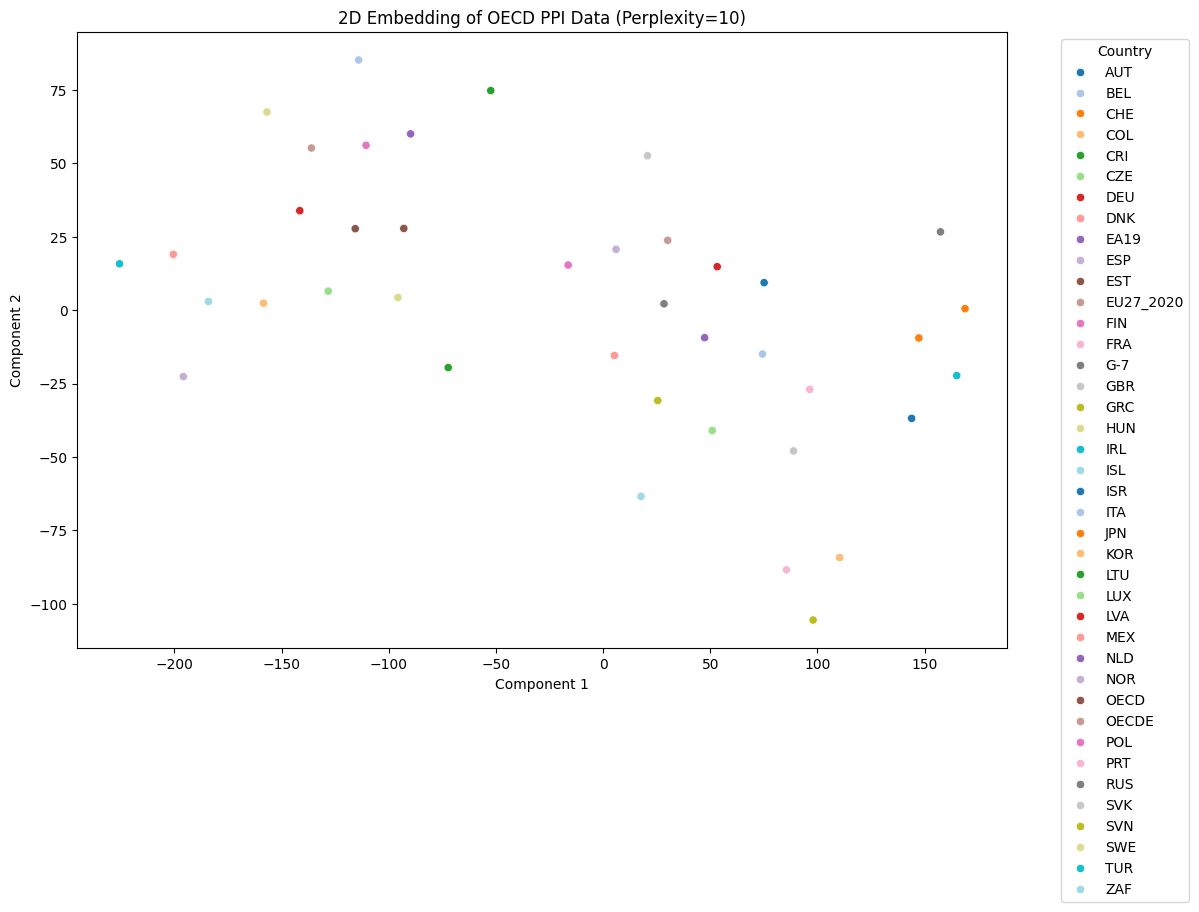

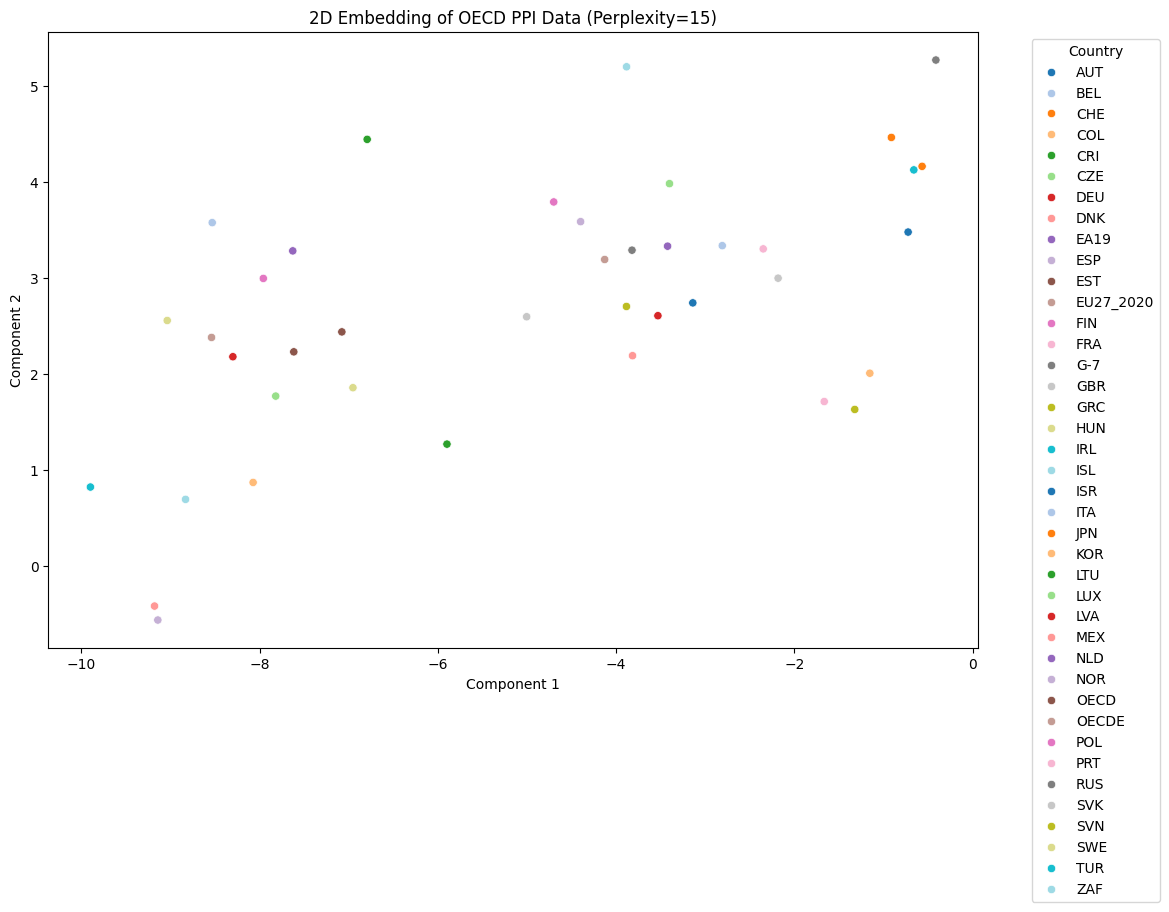

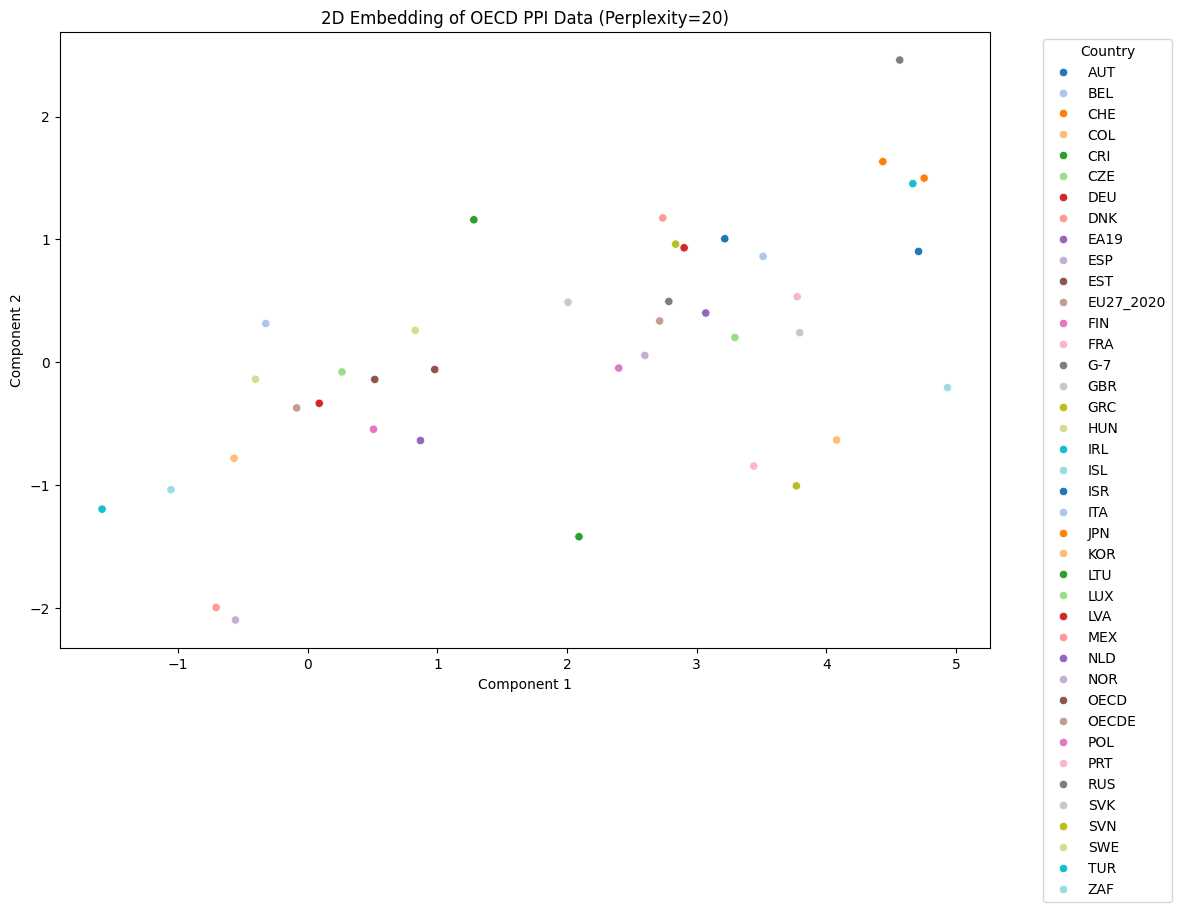

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define a list of perplexity values to test
perplexities = [1, 2, 3, 4, 5, 6, 7, 10, 15, 20]

for perplexity in perplexities:
    # Initialize t-SNE with a specified perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    embedding = tsne.fit_transform(data_pivoted)

    tsne_df = pd.DataFrame(embedding, columns=["Component 1", "Component 2"])
    tsne_df["Country"] = data_pivoted.index

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x="Component 1", y="Component 2", 
        hue="Country", palette="tab20",
        data=tsne_df
    )
    plt.title(f'2D Embedding of OECD PPI Data (Perplexity={perplexity})')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Country")
    plt.show()


We see that perplexity = 5 is doing a good enough job. We will also use K-means clustering to cluster the locations together. So let's create the final 2D plot!

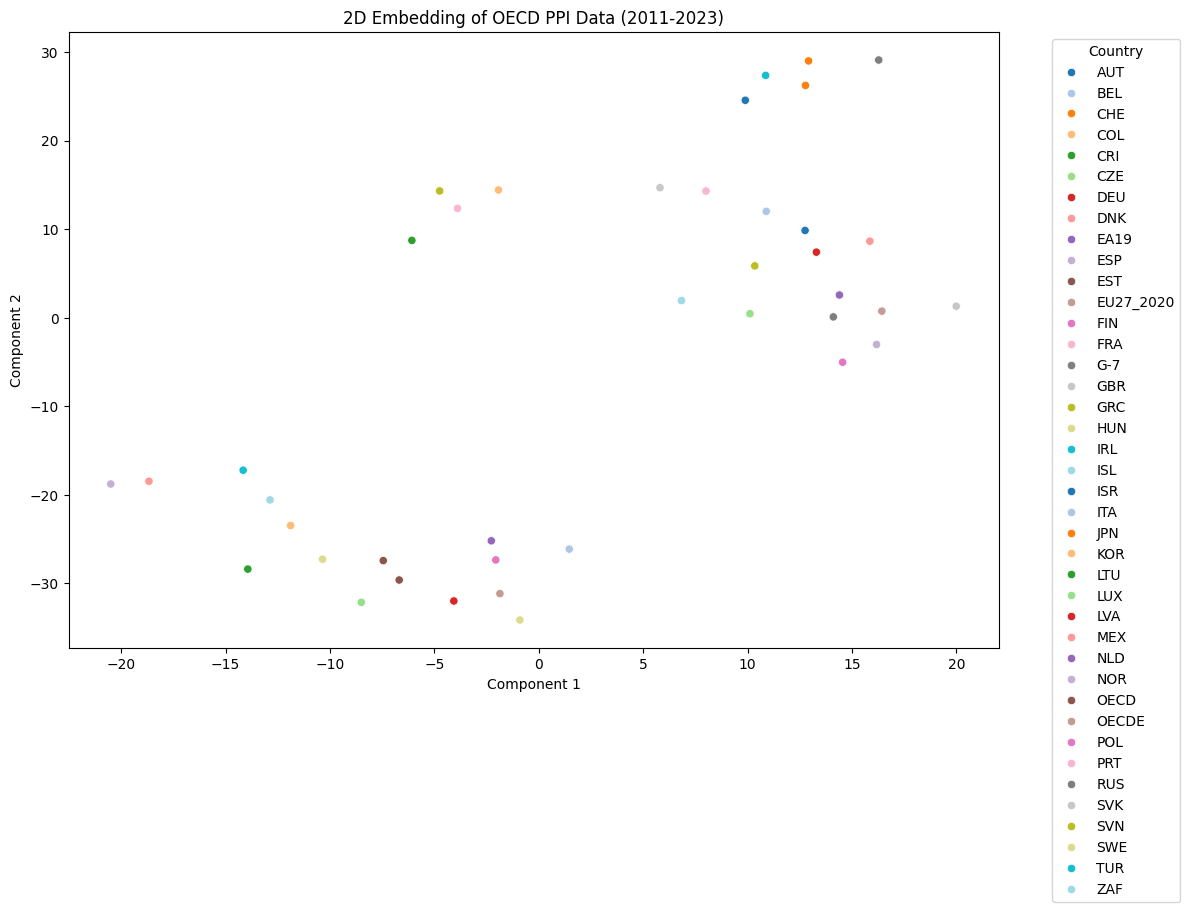

In [23]:
# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)

#Transform 
embedding = tsne.fit_transform(data_pivoted)

# Convert dataframe
tsne_df = pd.DataFrame(embedding, columns=["Component 1", "Component 2"])
tsne_df["Country"] = data_pivoted.index

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Component 1", y="Component 2", 
    hue="Country", palette="tab20",
    data=tsne_df
)
plt.title("2D Embedding of OECD PPI Data (2011-2023)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Country")
plt.show()


we can use k-means to cluster them together

/var/folders/96/zk8xrbrn2c92q4q77nf2c3700000gn/T/ipykernel_24752/1163295122.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_pivoted['Component_1'][i], data_pivoted['Component_2'][i], country,


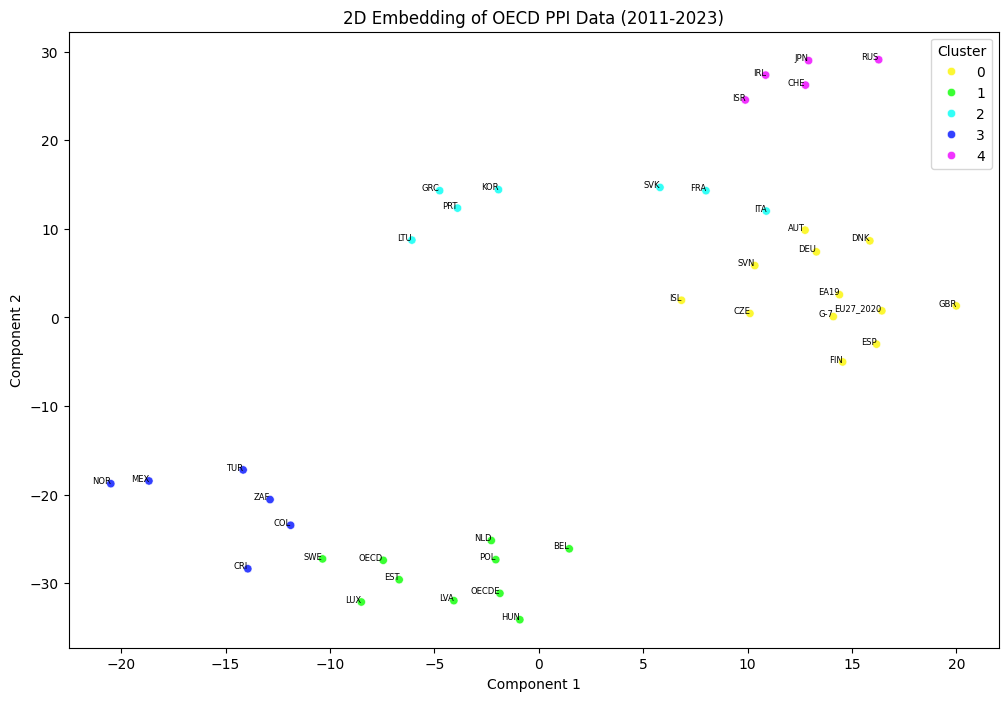

In [24]:
# Perform KMeans clustering for better cluster identification
n_clusters = 5  # You may need to adjust this based on visual interpretation
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_pivoted['Cluster'] = kmeans.fit_predict(embedding)

# Add the t-SNE results back to the dataframe
data_pivoted['Component_1'] = embedding[:, 0]
data_pivoted['Component_2'] = embedding[:, 1]

# Plot the t-SNE result with clustering
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Component_1', y='Component_2',
    hue='Cluster',
    palette=sns.color_palette("hsv", n_clusters),
    data=data_pivoted,
    alpha=0.8
)

# Annotate each point with the country code for easy identification
for i, country in enumerate(data_pivoted.index):
    plt.text(data_pivoted['Component_1'][i], data_pivoted['Component_2'][i], country, 
             fontsize=6, ha='right')

# Add title and labels
plt.title("2D Embedding of OECD PPI Data (2011-2023)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster", loc='best')
plt.show()


In [25]:
# Save the plot as a PNG
fig.savefig('HW6.png', dpi=300)